## Юнит 5. Основные алгоритмы машинного обучения. Часть I 
### Skillfactory: DSPR-19
### ML-3B. Классификация 

**Классификация** — самая популярная задача в машинном обучении. Алгоритм в ней сортирует объекты по нескольким классам. Можно сравнить его с ребенком, который раскладывает игрушки по коробкам — собачек в одну, а кошечек в другую.

У нас есть некоторое количество объектов, каждый из которых принадлежит определенной группе (**классу**). На обучающей выборке нам известны эти соотношения (известно, какой объект какому классу принадлежит). Нам требуется построить алгоритм на обучающей выборке, который сможет в будущем определять классы для новых объектов.

**Какие задачи можно решать с помощью классификации?**

На данный момент классификация используется в следующих сферах:

- Спам-фильтры и прочие фильтры почтовых ящиков: скорее всего, ваш почтовый клиент умеет не только отделять спам, но и сортировать письма от социальных сетей и промоакции.
- Определение языка: с этим мы сталкиваемся постоянно, когда браузер предлагает нам перевести страницу или когда мы используем онлайн-переводчик, не зная языка оригинала.
- Анализ тональности: к примеру, алгоритм может распознать, отрицательный или положительный отзыв написал вам клиент.
- Распознавание рукописных букв и цифр: на данный момент уже существуют программы, переводящие рукописный текст в печатный. Это возможно именно благодаря классификации.

Рассмотрим чуть подробнее несколько крупных и часто встречающихся задач, которые можно решить с помощью алгоритмов классификации.

#### Задача кредитного скоринга


На основе данных предыдущих кредиторов банк решает, выдавать ли кредит клиенту.

В такой задаче у нас всего два класса: **надежный заемщик** или **ненадежный**.

Признаки обычно бывают всех типов:

- бинарные (пол, наличие квартиры под залог, семейное положение);
- номинальные (место проживания,профессия);
- ординальные (образование, должность);
- количественные (доход, возраст).

Задача довольно классическая, редко требует долгой предобработки (в силу того, что для кредита нужно обязательно заполнять все поля, пропусков тоже не допускается).



#### Задача биометрической идентификации личности

Для биометрической идентификации личности используют обычно снимок радужки глаза и/или отпечаток пальца.  Это изображения, поэтому к решению задачи требуется достаточно объемная подготовка данных. Кроме того, тут предельно важна максимально возможная точность.

#### Задача категоризации текстовых документов

Одна из нетривиальных задач — распределение документов по рубрикам.

Здесь встречаются следующие признаки:

- номинальные (автор, издание, год);
- количественные (встречаемость слов и специфических терминов).

Главная проблема такой задачи в том, что каждый документ может попасть в две рубрики. Кроме того, данные могут иметь большое количество пропусков.

Подводя итог, можно сказать, что классификация используется там, где мы делим объекты на какие-то группы. Количество групп не имеет значения, однако оно должно быть конечным.

### 3B.2. Метрики качества классификации


После того, как мы обучили классификатор, необходимо **оценить его качество**. Для этого у нас есть несколько метрик.

Самая простая и понятная метрика — *Accuracy*. По сути, это просто доля объектов, которые алгоритм отнес к верному классу.

Введем следующие обозначения.

Тот класс, который мы диагностируем, назовем **позитивным**, а другой класс — **негативным**. 

Например, если мы хотим обучить алгоритм распознавать больных людей, то больные будут попадать в позитивный класс, а здоровые — в негативный.

Тогда верно определенных больных мы обозначим за **TP** *(true positive)*, ошибочно определенных больных — за **FP** *(false positive)*, верно определенных здоровых — за **TN** *(true negative)*, ошибочно определенных здоровых — за **FN** *(false negative)*.

То есть:

**TP** — истинно-положительные решения;  
**TN** — истинно-отрицательные решения;  
**FP** — ложно-положительные решения;  
**FN** — ложно-отрицательные решения.

### Accuracy = (TP+TN) / (TP+FP+FN+TN)

**Важно!**  
Важно отметить, что у этой метрики есть довольно существенный недостаток. Она присваивает всем объектам одинаковый вес. Поэтому в случае несбалансированности классов она может давать нерелевантный результат.

То есть, к примеру, классификатор может иметь *Accuracy* в районе 0,8 и при этом вообще не распознавать объекты из какого-то класса, если их очень мало. Поэтому обязательно необходимо проверять сбалансированность классов перед применением этой метрики.

**Точность и полнота**  
Следующие важные метрики — _Precision_ (точность) и _Recall_ (полнота). Они вычисляются следующим образом:

### Precision = TP / (TP + FP)  
### Recall = TP / (TP + FN)  

**Точность классификации** — это доля объектов, действительно принадлежащих данному классу относительно всех объектов, которые алгоритм отнес к этому классу.

**Полнота** — это доля найденных классификатором объектов, принадлежащих классу относительно всех объектов, которые принадлежат этому классу.

**F-мера**
Чтобы найти оптимальное соотношение этих показателей, существует метрика, которая объединяет в себе сразу и точность, и полноту F — мера. F-мера является средним гармоническим между точностью и полнотой и вычисляется по следующей формуле:

### F - мера = (2 * Precision * Recall) / (Precision + Recall)

### Реализация в Python
Для начала подгружаем библиотеки:



In [1]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации

Воспользуемся встроенным датасетом, который содержит информацию об опухолях груди:



In [2]:
from sklearn.datasets import load_breast_cancer # подгружаем датасет
breast_cancer = load_breast_cancer()

Теперь зададим зависимую и независимые переменные:



In [3]:
Y = breast_cancer.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = breast_cancer.data # X - признаки, по которым мы будем предсказывать рак 

Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:



In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

/home/dell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Готово! Теперь осталось только вычислить необходимые метрики:



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))
print(precision_score(Y_val,Y_predicted))
print(recall_score(Y_val,Y_predicted))
print(f1_score(Y_val,Y_predicted))

0.9590643274853801
0.9351851851851852
1.0
0.9665071770334929


### Задание 3B.2.1
Вы создали классификатор, который разделяет экономические и политические новости на два разных Telegram-канала, и хотите проверить его качество. За день вышло 15 политических новостей и 20 экономических.
Ваш алгоритм из 15 политических новостей отметил 9 как экономические, а из 20 экономических — 6 как политические.
Найдите метрику _Accuracy_.
Ответ округлите до сотых.

<img src="pictures/solution3B_2_1.png" width="600"/>

In [10]:
TP = 14
FP = 6
FN = 9
TN = 6
acc = (TP+TN)/(TP+FP+FN+TN)

print(f"Accuracy = {round(acc,2)}")

Accuracy = 0.57


### Задание 3B2.2
Загрузите встроенный в библиотеку sklearn датасет про ирисы с помощью функции load_iris. Обучите модель логистической регрессии (random_state=50, размер тестовой выборки 0.3) и укажите полученное значение метрики Accuracy.
Ответ округлите до сотых. 

In [26]:
from sklearn.datasets import  load_iris # подгружаем датасет
iris =  load_iris()

In [35]:
# выведем описание датасета
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [33]:
import numpy as np
np.random.seed(50)
# зададим зависимую и независимые переменные:
Y = iris.target ## Наша целевая переменная, три класса - 0 - Setosa, 1 - Versicolor,  2 - Virginica
X = iris.data # X - признаки, по которым мы будем предсказывать класс ириса

# Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

# предсказываем целевые значения на тестовой выборке и выводим accuracy
Y_predicted = model.predict(X_val)
accuracy = accuracy_score(Y_val,Y_predicted)

print(f"Accuracy = {round(accuracy,2)}")

Accuracy = 0.98


/home/dell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3B.3. Классификация. Практика


У вас есть датасет с параметрами мобильных телефонов. Переменная price_range отвечает за то, к какой категории относится телефон: 1 — дорогие, 0 — дешевые.  
Ваша задача состоит в том, чтобы наиболее точно научиться классифицировать телефоны по этим двум категориям на основании других параметров.  

*Шаг 1*  
Для начала нам надо отобрать признаки, с помощью которых мы будем предсказывать категорию телефона.  
### Задание 3B.3.1 Отбор признаков  
Выберите пять признаков, у которых наибольшая взаимосвязь с целевой переменной (с помощью корреляции). Отметьте отобранные признаки:

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# подгрузим файл и посмотрим на его первые строки:
df = pd.read_csv('train_mobile.csv', sep =';')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

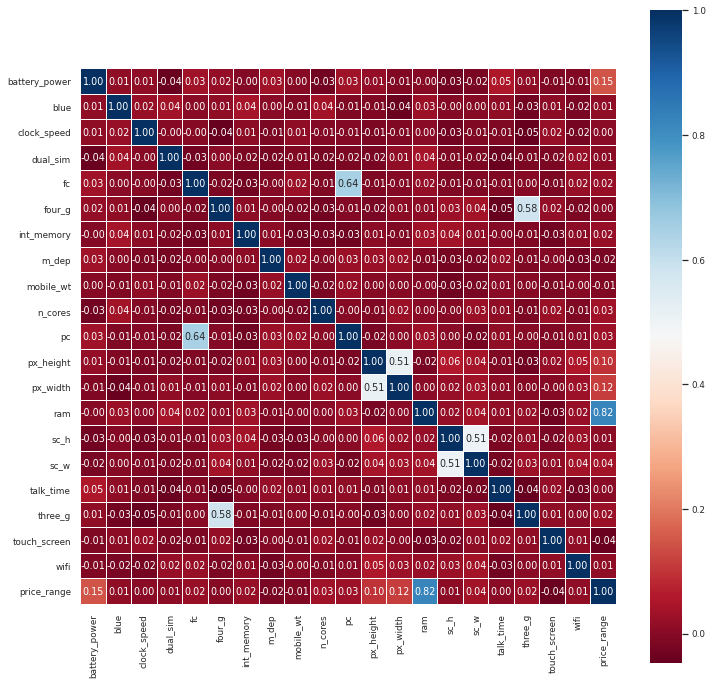

In [39]:
# Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков: 
sns.set(font_scale=0.8)
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

In [40]:
corr_df = abs(df.corr()['price_range'])
corr_df.sort_values(ascending=False)[0:6]

price_range      1.000000
ram              0.822354
battery_power    0.149402
px_width         0.116703
px_height        0.097951
touch_screen     0.040001
Name: price_range, dtype: float64

In [41]:
from itertools import zip_longest

temp = list(corr_df.sort_values(ascending=False)[0:6].index)

print(f"Пять признаков, у которых наибольшая взаимосвязь с целевой переменной:")
print(*[str(i)+'. '+str(g) for i,g in zip_longest(range(len(temp)),temp) if i != 0], sep='\n')

Пять признаков, у которых наибольшая взаимосвязь с целевой переменной:
1. ram
2. battery_power
3. px_width
4. px_height
5. touch_screen


*ШАГ 2*  
Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте 0.2. Параметр random_state=31. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.  

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории.  

### Задание 3B.3.2 Выбор метрики
Что это за метрика?  
***Ответ:*** - precision

<img src="pictures/solution3B_3_2.png" width="600"/>

### 3B.3.3 Значение метрики
Введите полученное значение,  
***округлите до четырех знаков после запятой.***

In [44]:
np.random.seed(31)

# зададим зависимую и независимые переменные:
X = df.loc[:, ['ram','battery_power', 'px_width', 'px_height', 'touch_screen']] 
Y = df['price_range']

# Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)
model = LogisticRegression()
model.fit(X_train, Y_train)

# предсказываем целевые значения на тестовой выборке и выводим accuracy
Y_predicted = model.predict(X_val)
precision = precision_score(Y_val,Y_predicted)

print(f"precision = {round(precision,4)}")

precision = 0.9859


### 3B.4. Логистическая регрессия. Часть 1

Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на два полупространства, в каждом из которых прогнозируется одно из двух значений целевого класса. Если это можно сделать без ошибок, то обучающая выборка называется линейно разделимой.

### Задание 3B.4.1
Зачем вводится понятие margin?  
Ответ:  
- Чтобы свести классификацию к регрессии
- Чтобы сделать функцию потерь непрерывной
- Чтобы точнее оценивать качество модели

### Задание 3B.4.2
Какие из этих выборок линейно разделимы?  
Ответ:
- Правая линейно разделимая

### Задание 3B.4.3 
Почему линейная регрессия плохо подходит для предсказания вероятности?  
Ответ:
- Линейная регрессия может предсказать значения меньше 0 или больше 1

### 3B.5. Логистическая регрессия. Часть 2
Softmax — обобщение сигмоиды для многомерного случая. Функция преобразует вектор z размерности в вектор той же размерности, где каждая координата полученного вектора представлена вещественным числом в интервале [0,1] и сумма координат равна 1.